In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#def css_styling():
#    styles = open("custom.css", "r").read() #or edit path to custom.css
#    return HTML(styles)
#css_styling()

In [3]:
df = pd.read_csv("vqoesurvey.csv")
df1=df.rename(columns={"1.":"Quality", "Q4":"Comments"})
df1.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,DistributionChannel,UserLanguage,Quality,Comments,application,time,token,date,sess,Q4 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Distribution Channel,User Language,Please rate your quality of experience when us...,Any additional comments on your experience?,application,time,token,date,sess,Q4 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/Ne...","{""ImportId"":""endDate"",""timeZone"":""America/New_...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID3""}","{""ImportId"":""QID4_TEXT""}","{""ImportId"":""application""}","{""ImportId"":""time""}","{""ImportId"":""token""}","{""ImportId"":""date""}","{""ImportId"":""sess""}","{""ImportId"":""QID4_TEXT_6e2367f9f6164016a62603d..."
2,2017-09-27 15:55:49,2017-09-27 15:56:58,IP Address,*******,100,68,True,2017-09-27 15:56:58,R_21pRj98y3LaQZkI,*******,...,anonymous,EN,Excellent,This was prefetched by the google wifi AP,Youtube,15:14 PM,NaN,NaN,42b9b1e68ba90f3a5579b97dff8838f2,Unknown
3,2017-09-29 01:21:25,2017-09-29 01:21:38,IP Address,*******,100,12,True,2017-09-29 01:21:39,R_1dK1YfAEQQn56Iu,*******,...,anonymous,EN,Excellent,NaN,Youtube,06:30 AM,NaN,NaN,c58ae8d1ee362156d1219a17f0c7123b,NaN
4,2017-10-01 13:20:23,2017-10-01 13:20:42,IP Address,*******,100,19,True,2017-10-01 13:20:42,R_3rV8JPQkx6ADIea,*******,...,anonymous,EN,Excellent,NaN,Youtube,18:18 PM,NaN,NaN,5eafdb79e9f908d66d57e84e144510aa,NaN


In [4]:
dq=df1.groupby('Quality').count()[['Finished']]

In [5]:
dq1=dq.reset_index()
dq2=dq1.iloc[[True,True,False,True,True,False,True,False]]
dq2

,Quality,Finished
0,Excellent,844
1,Good,950
3,Neutral,76
4,Not Good,73
6,Poor,18


In [6]:
total=dq2['Finished'].sum()
canbeimprov=dq2['Finished'].iloc[[False, False, True, True, True]].sum() # sum Neutral / Not Good / Poor

SUMMARY: 167 of a 1961 total sampled video sessions can be signaficantly improved (8.52 %)
Title: Video Quality Rating 


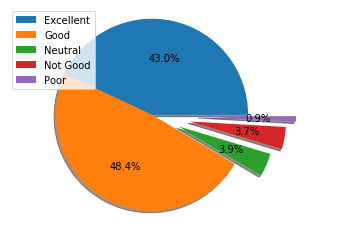

In [7]:

fig1, ax1 = plt.subplots() 
explode = [0,0,0.3,0.4,0.5]
print("SUMMARY: %d of a %s total sampled video sessions can be signaficantly improved (%.02f %%)"
      %  (canbeimprov, total, canbeimprov/total * 100))
ax1.pie(dq2['Finished'],explode=explode, autopct='%0.01f%%',
        shadow=True)
ax1.legend(dq2['Quality'], loc=2)
ax1.axis('equal')
fig1.savefig("surveyqualityshare.png")
print("Title: Video Quality Rating ")

### SUMMARY: 167 of a 1961 total sampled video sessions can be signaficantly improved (<span style="color:red">8.52</span> %).

There are 7098 words in the combination of all review.


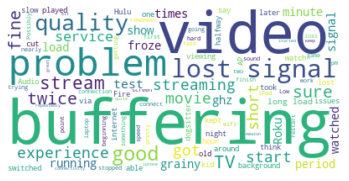

In [8]:
stopwords = set(STOPWORDS)
stopwords.update(["time", "Netflix", "watching", "Chromecast", "Youtube", ])
text = " ".join(comment for comment in df1.Comments if isinstance(comment, str))
print ("There are {} words in the combination of all review.".format(len(text)))
wordcloud = WordCloud(background_color="white",  max_words=100, stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file("surveywordcloud.png")

plt.show()